# Moutain Bike Project

A data analysis project to explore and visualize ride data, and make predictions about future mountain bike rides.

To do:  

Exploratory Analysis:  
Distributions of individual variables, boxplots, histograms  

Explore correlations:  
Make predictive model: input length, vft, output time, avg sp
CI? Hyp Test

Imports and setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.reset_defaults
sns.set_style(style='darkgrid')

Importing the data from two csv files, one for each bike. This makes it easy to add new ride data to csv file and reimport to keep everything up to date.

HH2 is a traditional mountaing bike, Espark is an electric pedal-assist mountian bike. 

In [7]:
mtb_df = pd.read_csv('mtb.csv', index_col='date')
emtb_df = pd.read_csv('emtb.csv', index_col='date')
mtb = pd.concat([mtb_df, emtb_df], sort=True)
mtb.tail()

,bike,dist,minutes,vft
date,,,,
2018-4-3,espark,19.43,116,2095
2018-4-8,espark,7.94,80,1418
2018-6-3,espark,8.30,63,1213
2018-6-8,espark,8.00,110,1888
2018-6-10,espark,18.50,135,2851


Capitalize the name of the ebike to standardize format.

In [8]:
c = lambda x: x.capitalize() if x=='espark' else x
mtb['bike'] = mtb['bike'].apply(c)

In [10]:
mtb.tail()

,bike,dist,minutes,vft
date,,,,
2018-4-3,Espark,19.43,116,2095
2018-4-8,Espark,7.94,80,1418
2018-6-3,Espark,8.30,63,1213
2018-6-8,Espark,8.00,110,1888
2018-6-10,Espark,18.50,135,2851


Adding columns for variables of interest.

In [13]:
mtb['vft_per_mi'] = mtb['vft'] / mtb['dist']
mtb['avg_spd'] = mtb['dist'] / (mtb['minutes'] / 60)
mtb['min_per_mile'] = mtb['minutes'] / mtb['dist']
mtb['min_per_vft'] = mtb['minutes'] / mtb['vft']
mtb.tail()

,bike,dist,minutes,vft,vft_per_mi,avg_spd,min_per_mile,min_per_vft
date,,,,,,,,
2018-4-3,Espark,19.43,116,2095,107.822954,10.050000,5.970149,0.055370
2018-4-8,Espark,7.94,80,1418,178.589421,5.955000,10.075567,0.056417
2018-6-3,Espark,8.30,63,1213,146.144578,7.904762,7.590361,0.051937
2018-6-8,Espark,8.00,110,1888,236.000000,4.363636,13.750000,0.058263
2018-6-10,Espark,18.50,135,2851,154.108108,8.222222,7.297297,0.047352


In [14]:
mtb.describe()

,dist,minutes,vft,vft_per_mi,avg_spd,min_per_mile,min_per_vft
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,14.534054,125.243243,2178.972973,151.012322,7.282533,8.771507,0.061708
std,5.437261,51.638382,941.962387,35.609140,2.001648,2.125018,0.022489
min,5.700000,52.000000,529.000000,64.117647,4.363636,4.090909,0.027449
25%,9.600000,79.000000,1729.000000,135.219326,5.898750,7.121058,0.044001
50%,14.200000,119.000000,1924.000000,149.196957,6.771429,8.860759,0.058263
75%,18.500000,159.000000,2727.000000,173.960217,8.425714,10.171647,0.069524
max,26.000000,238.000000,4204.000000,236.000000,14.666667,13.750000,0.142202


## Let's visualize at the data!

In [15]:
sns.set_context(context='poster')

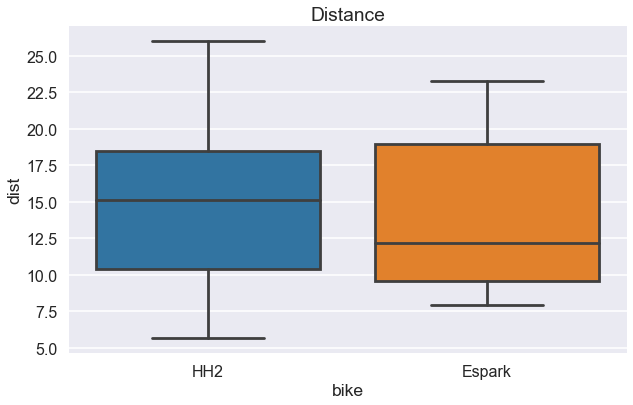

In [16]:
plt.figure(figsize=[10,6])
ax = sns.boxplot(x='bike', y='dist', data=mtb)
plt.title('Distance')
plt.show()

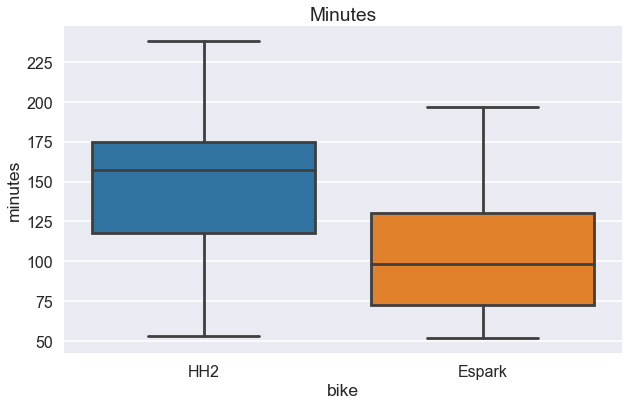

In [17]:
plt.figure(figsize=[10,6])
ax = sns.boxplot(x='bike', y='minutes', data=mtb)
plt.title('Minutes')
plt.show()

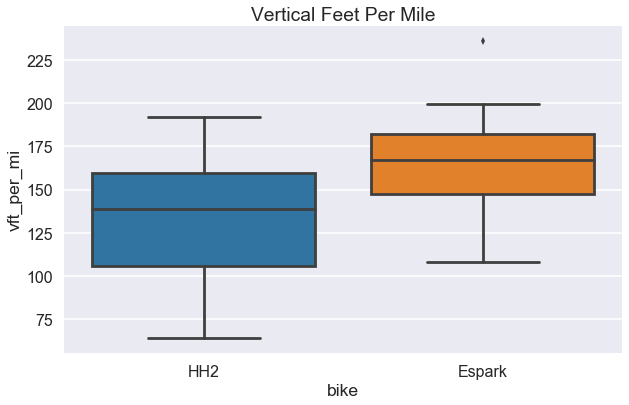

In [18]:
plt.figure(figsize=[10,6])
ax = sns.boxplot(x='bike', y='vft_per_mi', data=mtb)
plt.title('Vertical Feet Per Mile')
plt.show()

##### Interesting. Distances tend to be the same. However, with the ebike the rides tend to be shorter and steeper.

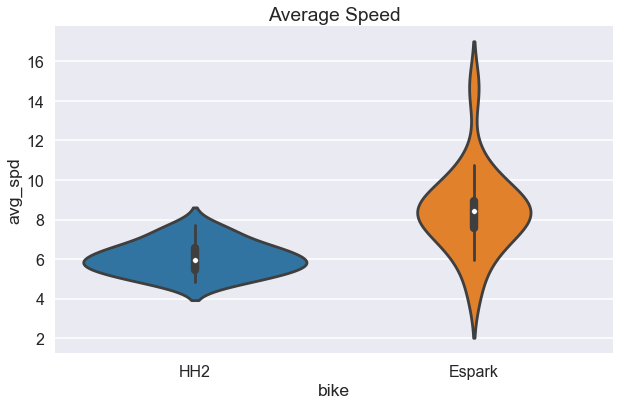

In [19]:
plt.figure(figsize=[10,6])
ax = sns.violinplot(x='bike', y='avg_spd', data=mtb)
plt.title('Average Speed')
plt.show()

##### No surprise here: average speeds are faster and have more variance with the ebike

# Easy and Hard Rides

Let's take a look at the easiest and hardest rides, defined as those with more extreme values for distance and vertical feet.

In [20]:
easy_rides = mtb[(mtb['dist']<=(mtb['dist'].quantile(0.25))) & (mtb['vft']<=(mtb['vft'].quantile(0.25)))]
easy_rides

,bike,dist,minutes,vft,vft_per_mi,avg_spd,min_per_mile,min_per_vft
date,,,,,,,,
2017-10-7,HH2,8.70,87,1257,144.482759,6.000000,10.000000,0.069212
2017-10-15,HH2,6.20,64,874,140.967742,5.812500,10.322581,0.073227
2017-11-8,HH2,9.60,119,1729,180.104167,4.840336,12.395833,0.068826
2017-12-24,HH2,6.80,53,529,77.794118,7.698113,7.794118,0.100189
2017-12-28,HH2,5.70,64,778,136.491228,5.343750,11.228070,0.082262
2018-3-12,Espark,9.32,52,1245,133.583691,10.753846,5.579399,0.041767
2018-4-8,Espark,7.94,80,1418,178.589421,5.955000,10.075567,0.056417
2018-6-3,Espark,8.30,63,1213,146.144578,7.904762,7.590361,0.051937


In [21]:
hard_rides = mtb[(mtb['dist']>=(mtb['dist'].quantile(0.75))) & (mtb['vft']>=(mtb['vft'].quantile(0.75)))]
hard_rides

,bike,dist,minutes,vft,vft_per_mi,avg_spd,min_per_mile,min_per_vft
date,,,,,,,,
2017-12-3,HH2,18.50,202,3193,172.594595,5.495050,10.918919,0.063263
2017-12-9,HH2,26.00,238,3454,132.846154,6.554622,9.153846,0.068906
2017-12-17,HH2,21.60,223,3475,160.879630,5.811659,10.324074,0.064173
2018-1-20,Espark,21.70,149,4028,185.622120,8.738255,6.866359,0.036991
2018-1-28,Espark,21.68,197,3627,167.297048,6.603046,9.086716,0.054315
2018-2-11,Espark,23.30,172,3909,167.768240,8.127907,7.381974,0.044001
2018-2-16,Espark,21.05,145,4204,199.714964,8.710345,6.888361,0.034491
2018-6-10,Espark,18.50,135,2851,154.108108,8.222222,7.297297,0.047352


Let's add these categories back to the original dataframe to facilitate comparisons.

In [22]:
mtb.loc[(mtb['dist']<=(mtb['dist'].quantile(0.25))) & 
        (mtb['vft']<=(mtb['vft'].quantile(0.25))), 'category'] = 'easy'
mtb.loc[(mtb['dist']>=(mtb['dist'].quantile(0.75))) & 
        (mtb['vft']>=(mtb['vft'].quantile(0.75))), 'category'] = 'hard'
mtb.fillna(value='medium', inplace=True)

In [87]:
mtb.head(10)

,bike,dist,minutes,vft,vft_per_mi,avg_spd,min_per_mile,min_per_vft,category
date,,,,,,,,,
2017-10-7,HH2,8.7,87,1257,144.482759,6.000000,10.000000,0.069212,easy
2017-10-15,HH2,6.2,64,874,140.967742,5.812500,10.322581,0.073227,easy
2017-10-21,HH2,12.8,117,1191,93.046875,6.564103,9.140625,0.098237,medium
2017-10-30,HH2,19.3,163,1856,96.165803,7.104294,8.445596,0.087823,medium
2017-11-5,HH2,14.2,133,1913,134.718310,6.406015,9.366197,0.069524,medium
2017-11-8,HH2,9.6,119,1729,180.104167,4.840336,12.395833,0.068826,easy
2017-11-11,HH2,19.4,159,1882,97.010309,7.320755,8.195876,0.084485,medium
2017-11-19,HH2,18.4,212,2727,148.206522,5.207547,11.521739,0.077741,medium
2017-11-24,HH2,17.0,155,1090,64.117647,6.580645,9.117647,0.142202,medium


In [77]:
mtb['category'].value_counts()

medium    19
easy      10
hard       8
Name: category, dtype: int64

Let's visualize the rides by category to compare the difference.

Text(0.5,1,'Distance by Category')

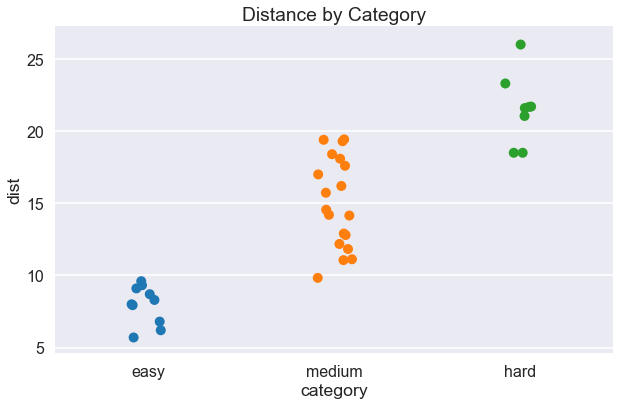

In [85]:
plt.figure(figsize=[10,6])
ax = sns.stripplot(x='category', y='dist', data=mtb, jitter=True, size=10)
plt.title('Distance by Category')

Text(0.5,1,'Vertical Feet by Category')

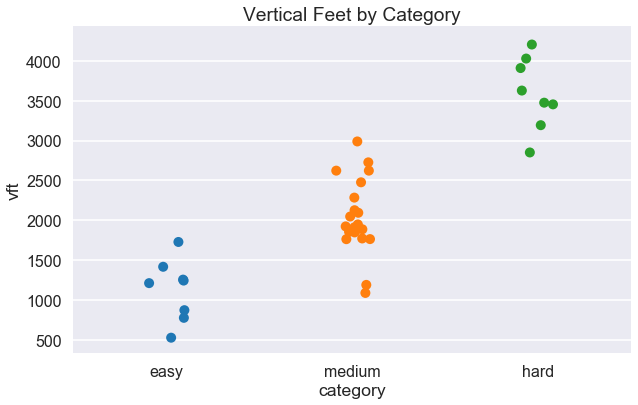

In [23]:
plt.figure(figsize=[10,6])
ax = sns.stripplot(x='category', y='vft', data=mtb, jitter=True, size=10)
plt.title('Vertical Feet by Category')

Now let's look at some correlation coefficients to see which variables are correlated.

In [24]:
mtb.corr()

,dist,minutes,vft,vft_per_mi,avg_spd,min_per_mile,min_per_vft
dist,1.000000,0.820143,0.833569,-0.084128,0.154113,-0.199458,-0.057657
minutes,0.820143,1.000000,0.699832,0.000670,-0.398185,0.363399,0.232243
vft,0.833569,0.699832,1.000000,0.443172,0.100725,-0.101872,-0.447227
vft_per_mi,-0.084128,0.000670,0.443172,1.000000,-0.127106,0.226795,-0.702332
avg_spd,0.154113,-0.398185,0.100725,-0.127106,1.000000,-0.937227,-0.519475
min_per_mile,-0.199458,0.363399,-0.101872,0.226795,-0.937227,1.000000,0.459500
min_per_vft,-0.057657,0.232243,-0.447227,-0.702332,-0.519475,0.459500,1.000000


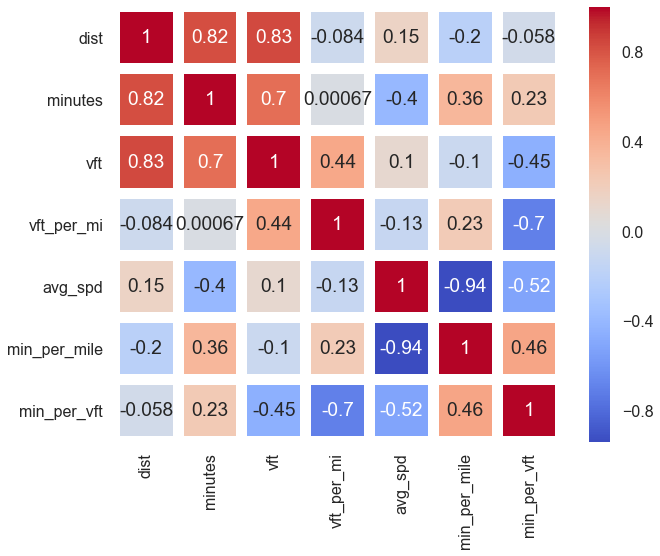

In [25]:
plt.figure(figsize=[10,8])
ax = sns.heatmap(mtb.corr(), cmap='coolwarm', linecolor='white', linewidth=10, annot=True)

Most correlations look pretty weak when looking at all rides, except those which are obvious such as distance and time. This makes sense given the differences between a traditional mountain bike and an ebike. Let's look at just the rides with the traditional bike.

In [26]:
mtb[mtb['bike']=='HH2'].corr()

,dist,minutes,vft,vft_per_mi,avg_spd,min_per_mile,min_per_vft
dist,1.000000,0.941771,0.807719,-0.017202,0.161429,-0.194526,-0.069337
minutes,0.941771,1.000000,0.924921,0.261136,-0.154191,0.124329,-0.230436
vft,0.807719,0.924921,1.000000,0.549777,-0.320567,0.291109,-0.559365
vft_per_mi,-0.017202,0.261136,0.549777,1.000000,-0.854139,0.849620,-0.850191
avg_spd,0.161429,-0.154191,-0.320567,-0.854139,1.000000,-0.990049,0.507777
min_per_mile,-0.194526,0.124329,0.291109,0.849620,-0.990049,1.000000,-0.493508
min_per_vft,-0.069337,-0.230436,-0.559365,-0.850191,0.507777,-0.493508,1.000000


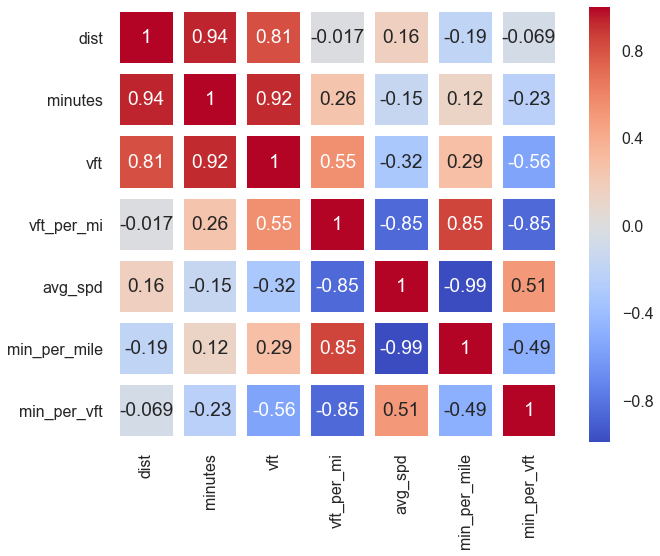

In [27]:
plt.figure(figsize=[10,8])
ax = sns.heatmap(mtb[mtb['bike']=='HH2'].corr(), cmap='coolwarm', linecolor='white', linewidth=10, annot=True)

That's a bit better. The variable I'd like to be able to predict is how long a given ride will take. Given distance and climbing, I'd like to have a reasonable prediction about how long a ride is going to take. Vertical feet per mile is strongly correlated with average speed, which will tell me how long a ride will take given it's distance. I can use vertical feet per mile to predict average speed, then use distance to calculate predicted time.

I would have suspected that distance would also correlate with average speed. On short ride I can go all out from the beginning, whereas on a long ride I tend to try and conserve some energy. However with a correlation coefficient of 0.16 (0.15 when both bikes are considered) there is only a weak correlation, suggesting that ride distance does not affect average speed very much.

Let's look at some scatterplots to see vertical feet per mile correlates wtih average speed for each bike.

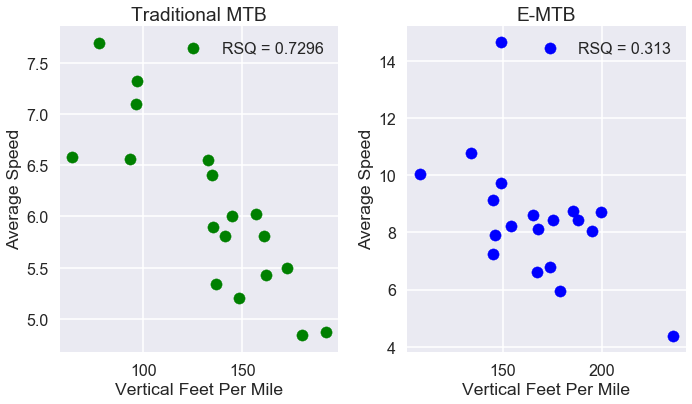

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,6))
axes[0].scatter(mtb[mtb['bike']=='HH2']['vft_per_mi'], mtb[mtb['bike']=='HH2']['avg_spd'], 
        color = 'green', label='RSQ = ' + str(np.round(((np.corrcoef(mtb[mtb['bike']=='HH2']['avg_spd'], 
        mtb[mtb['bike']=='HH2']['vft_per_mi']))**2)[0,1], decimals = 4)))
axes[0].set_title('Traditional MTB')
axes[0].set_xlabel('Vertical Feet Per Mile')
axes[0].set_ylabel('Average Speed')
axes[1].scatter(mtb[mtb['bike']=='Espark']['vft_per_mi'], mtb[mtb['bike']=='Espark']['avg_spd'], 
        color = 'blue', label='RSQ = ' + str(np.round(((np.corrcoef(mtb[mtb['bike']=='Espark']['avg_spd'], 
        mtb[mtb['bike']=='Espark']['vft_per_mi']))**2)[0,1], decimals = 4)))
axes[1].set_title('E-MTB')
axes[1].set_xlabel('Vertical Feet Per Mile')
axes[1].set_ylabel('Average Speed')
axes[0].legend()
axes[1].legend()
plt.tight_layout()

The r-squared values tell the story. The prediction for average speed based on vertical feer per mile is about 73% better than using the mean for the traditional bike. For the ebike the coeficient of determination is rather low, indicating thast the prediction for average speed is only about 31% better than the mean.

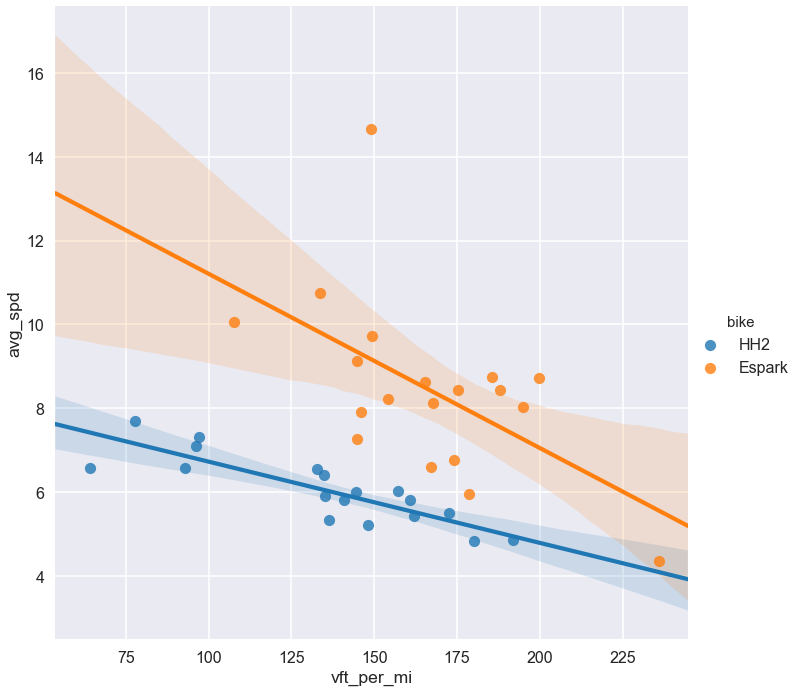

In [29]:
ax = sns.lmplot(x='vft_per_mi', y='avg_spd', data=mtb, hue='bike', size=10)
# plt.show()

Visualized together with a regression line, we can clearly see the difference in bikes and predictability of ride time (via average speed)

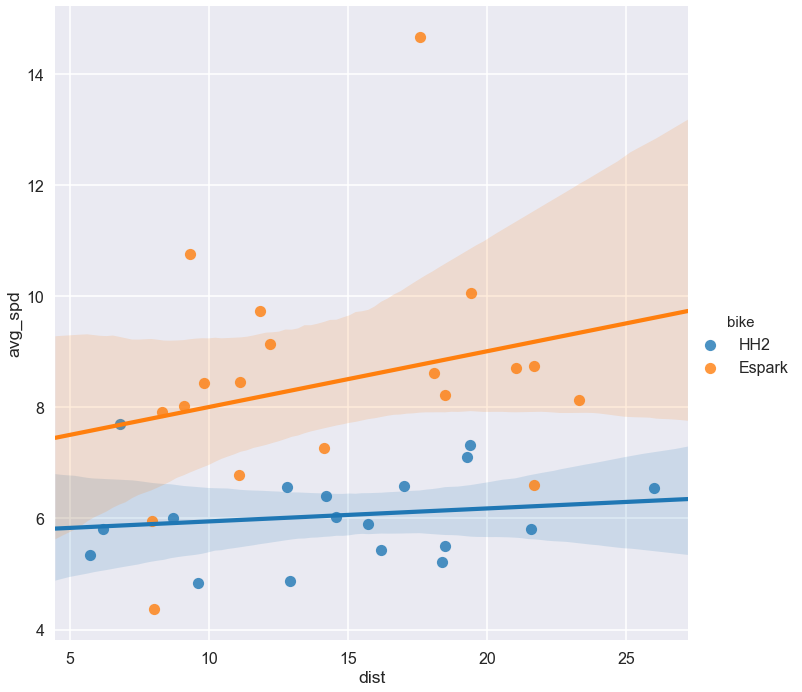

In [30]:
sns.lmplot(x='dist', y='avg_spd', data=mtb, hue='bike', size=10)

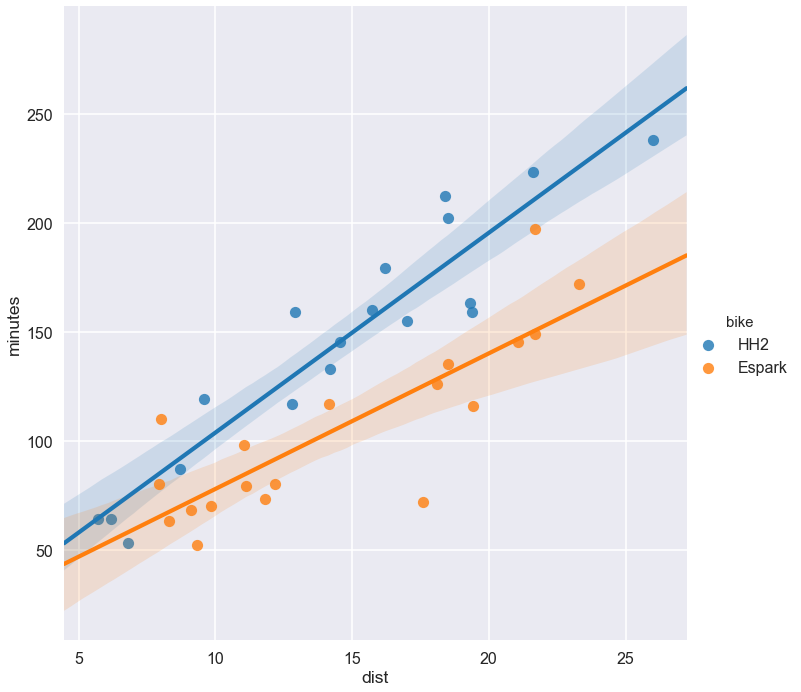

In [31]:
sns.lmplot(x='dist', y='minutes', data=mtb, hue='bike', size=10)

Since the average speeds have less variance with the traditional bike, I could simply use distance to predict time. However, with both bikes the prediction is slightly weaker with a coefficient of determination of 0.6724 

# Conclusion